<a href="https://colab.research.google.com/github/igormurigor/games_project/blob/main/USsales1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [44]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import stats as st

import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

df=pd.read_excel('/content/gdrive/My Drive/content/Sample_Superstore.xls')
v=df["Region"].value_counts()

display(v)

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          9994 non-null   int64         
 1   Order ID        9994 non-null   object        
 2   Order Date      9994 non-null   datetime64[ns]
 3   Ship Date       9994 non-null   datetime64[ns]
 4   Ship Mode       9994 non-null   object        
 5   Customer ID     9994 non-null   object        
 6   Customer Name   9994 non-null   object        
 7   Segment         9994 non-null   object        
 8   Country/Region  9994 non-null   object        
 9   City            9994 non-null   object        
 10  State           9994 non-null   object        
 11  Postal Code     9983 non-null   float64       
 12  Region          9994 non-null   object        
 13  Product ID      9994 non-null   object        
 14  Category        9994 non-null   object        
 15  Sub-

In [46]:
df=df[df["Region"]=="Central"]

display(df.head())

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
14,15,US-2019-118983,2019-11-22,2019-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106.0,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.810,5,0.8,-123.8580
15,16,US-2019-118983,2019-11-22,2019-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106.0,Central,OFF-BI-10000756,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.544,3,0.8,-3.8160
16,17,CA-2018-105893,2018-11-11,2018-11-18,Standard Class,PK-19075,Pete Kriz,Consumer,United States,Madison,Wisconsin,53711.0,Central,OFF-ST-10004186,Office Supplies,Storage,"Stur-D-Stor Shelving, Vertical 5-Shelf: 72""H x...",665.880,6,0.0,13.3176
21,22,CA-2020-137330,2020-12-09,2020-12-13,Standard Class,KB-16585,Ken Black,Corporate,United States,Fremont,Nebraska,68025.0,Central,OFF-AR-10000246,Office Supplies,Art,Newell 318,19.460,7,0.0,5.0596
22,23,CA-2020-137330,2020-12-09,2020-12-13,Standard Class,KB-16585,Ken Black,Corporate,United States,Fremont,Nebraska,68025.0,Central,OFF-AP-10001492,Office Supplies,Appliances,"Acco Six-Outlet Power Strip, 4' Cord Length",60.340,7,0.0,15.6884


In [47]:
print(df["Order Date"].max())

2021-12-30 00:00:00


В таблице у же есть заказы на конец 2021 года 


In [48]:
df["year"]=df["Order Date"].dt.year
display(df.head())

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,year
14,15,US-2019-118983,2019-11-22,2019-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106.0,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.810,5,0.8,-123.8580,2019
15,16,US-2019-118983,2019-11-22,2019-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106.0,Central,OFF-BI-10000756,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.544,3,0.8,-3.8160,2019
16,17,CA-2018-105893,2018-11-11,2018-11-18,Standard Class,PK-19075,Pete Kriz,Consumer,United States,Madison,Wisconsin,53711.0,Central,OFF-ST-10004186,Office Supplies,Storage,"Stur-D-Stor Shelving, Vertical 5-Shelf: 72""H x...",665.880,6,0.0,13.3176,2018
21,22,CA-2020-137330,2020-12-09,2020-12-13,Standard Class,KB-16585,Ken Black,Corporate,United States,Fremont,Nebraska,68025.0,Central,OFF-AR-10000246,Office Supplies,Art,Newell 318,19.460,7,0.0,5.0596,2020
22,23,CA-2020-137330,2020-12-09,2020-12-13,Standard Class,KB-16585,Ken Black,Corporate,United States,Fremont,Nebraska,68025.0,Central,OFF-AP-10001492,Office Supplies,Appliances,"Acco Six-Outlet Power Strip, 4' Cord Length",60.340,7,0.0,15.6884,2020


Определяем самые быстрорастущие сегменты по годам 

In [49]:
seg=df[df["year"]>=2020]
seg= seg.groupby(["year","Segment"])["Sales"].sum()

display(seg)

year  Segment    
2020  Consumer       66707.0332
      Corporate      60714.1138
      Home Office    20008.2290
2021  Consumer       68345.6754
      Corporate      48300.0334
      Home Office    30452.4194
Name: Sales, dtype: float64

Видим ,что быстрее всех по количеству продаж 
 относительно  прошлого года  растет  сегмент Home Office

In [50]:
df=df[df["Segment"]=="Home Office"]

display(df)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,year
14,15,US-2019-118983,2019-11-22,2019-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106.0,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5,0.80,-123.8580,2019
15,16,US-2019-118983,2019-11-22,2019-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106.0,Central,OFF-BI-10000756,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.5440,3,0.80,-3.8160,2019
34,35,CA-2021-107727,2021-10-19,2021-10-23,Second Class,MA-17560,Matt Abelman,Home Office,United States,Houston,Texas,77095.0,Central,OFF-PA-10000249,Office Supplies,Paper,Easy-staple paper,29.4720,3,0.20,9.9468,2021
37,38,CA-2019-117415,2019-12-27,2019-12-31,Standard Class,SN-20710,Steve Nguyen,Home Office,United States,Houston,Texas,77041.0,Central,OFF-EN-10002986,Office Supplies,Envelopes,"#10-4 1/8"" x 9 1/2"" Premium Diagonal Seam Enve...",113.3280,9,0.20,35.4150,2019
38,39,CA-2019-117415,2019-12-27,2019-12-31,Standard Class,SN-20710,Steve Nguyen,Home Office,United States,Houston,Texas,77041.0,Central,FUR-BO-10002545,Furniture,Bookcases,"Atlantic Metals Mobile 3-Shelf Bookcases, Cust...",532.3992,3,0.32,-46.9764,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9863,9864,CA-2021-113278,2021-01-14,2021-01-20,Standard Class,HR-14770,Hallie Redmond,Home Office,United States,Richmond,Indiana,47374.0,Central,OFF-PA-10004156,Office Supplies,Paper,Xerox 188,11.3400,1,0.00,5.5566,2021
9864,9865,CA-2021-113278,2021-01-14,2021-01-20,Standard Class,HR-14770,Hallie Redmond,Home Office,United States,Richmond,Indiana,47374.0,Central,TEC-AC-10004469,Technology,Accessories,Microsoft Sculpt Comfort Mouse,159.8000,4,0.00,70.3120,2021
9865,9866,CA-2021-113278,2021-01-14,2021-01-20,Standard Class,HR-14770,Hallie Redmond,Home Office,United States,Richmond,Indiana,47374.0,Central,FUR-FU-10001037,Furniture,Furnishings,"DAX Charcoal/Nickel-Tone Document Frame, 5 x 7",18.9600,2,0.00,8.5320,2021
9961,9962,CA-2019-168088,2019-03-19,2019-03-22,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,Texas,77041.0,Central,OFF-PA-10000675,Office Supplies,Paper,Xerox 1919,65.5840,2,0.20,23.7742,2019


In [51]:
print(df["year"].value_counts())

2021    162
2020    107
2019     86
2018     83
Name: year, dtype: int64


In [52]:
sub=df[["Order Date","Customer Name","Sub-Category","Sales","Quantity","Profit"]]

display(sub)

,Order Date,Customer Name,Sub-Category,Sales,Quantity,Profit
14,2019-11-22,Harold Pawlan,Appliances,68.8100,5,-123.8580
15,2019-11-22,Harold Pawlan,Binders,2.5440,3,-3.8160
34,2021-10-19,Matt Abelman,Paper,29.4720,3,9.9468
37,2019-12-27,Steve Nguyen,Envelopes,113.3280,9,35.4150
38,2019-12-27,Steve Nguyen,Bookcases,532.3992,3,-46.9764
...,...,...,...,...,...,...
9863,2021-01-14,Hallie Redmond,Paper,11.3400,1,5.5566
9864,2021-01-14,Hallie Redmond,Accessories,159.8000,4,70.3120
9865,2021-01-14,Hallie Redmond,Furnishings,18.9600,2,8.5320
9961,2019-03-19,Corinna Mitchell,Paper,65.5840,2,23.7742


In [53]:
#sub["date"]=(sub["Order Date"]).dt.to_period('M')

sub['date']=sub['Order Date'].dt.year
sub['month'] = sub['Order Date'].to_numpy().astype('datetime64[M]')
sub=sub[sub["date"]>=2020]
display(sub)

,Order Date,Customer Name,Sub-Category,Sales,Quantity,Profit,date,month
34,2021-10-19,Matt Abelman,Paper,29.472,3,9.9468,2021,2021-10-01
84,2021-11-13,Christopher Schild,Storage,230.376,3,-48.9549,2021,2021-11-01
88,2020-04-05,Gary Mitchum,Storage,158.368,7,13.8572,2020,2020-04-01
99,2020-08-29,Rick Bensley,Paper,64.624,7,22.6184,2020,2020-08-01
100,2020-08-29,Rick Bensley,Accessories,95.976,3,-10.7973,2020,2020-08-01
...,...,...,...,...,...,...,...,...
9861,2021-01-14,Hallie Redmond,Storage,18.760,2,5.2528,2021,2021-01-01
9862,2021-01-14,Hallie Redmond,Accessories,12.120,4,2.5452,2021,2021-01-01
9863,2021-01-14,Hallie Redmond,Paper,11.340,1,5.5566,2021,2021-01-01
9864,2021-01-14,Hallie Redmond,Accessories,159.800,4,70.3120,2021,2021-01-01


In [54]:
sub_group=sub.groupby(["date","month","Sub-Category"]).agg({"Sales":"sum","Customer Name":"count"}).reset_index()
sub_group["ave_check"]=sub_group["Sales"]/sub_group["Customer Name"]

sub_group = sub_group.rename(columns={'Sub-Category': 'subcategory'})
display(sub_group.tail(10))

,date,month,subcategory,Sales,Customer Name,ave_check
159,2021,2021-11-01,Storage,862.890,4,215.722500
160,2021,2021-11-01,Tables,257.940,1,257.940000
161,2021,2021-12-01,Accessories,227.976,1,227.976000
162,2021,2021-12-01,Appliances,209.300,1,209.300000
163,2021,2021-12-01,Art,2.480,1,2.480000
164,2021,2021-12-01,Binders,65.800,3,21.933333
165,2021,2021-12-01,Envelopes,7.280,1,7.280000
166,2021,2021-12-01,Furnishings,17.952,2,8.976000
167,2021,2021-12-01,Paper,28.160,1,28.160000
168,2021,2021-12-01,Phones,52.680,1,52.680000


In [55]:
year_sub=sub_group.groupby(["date","subcategory"]).agg({"Sales":"sum","Customer Name":"sum"}).reset_index()
year_sub["ave_check"]=year_sub["Sales"]/year_sub["Customer Name"]
display(year_sub.head())

,date,subcategory,Sales,Customer Name,ave_check
0,2020,Accessories,1322.278,9,146.919778
1,2020,Appliances,3832.894,7,547.556286
2,2020,Art,243.828,9,27.092000
3,2020,Binders,406.120,14,29.008571
4,2020,Chairs,2743.908,5,548.781600


уникальные  подкатегории


In [56]:
sub_cat= sub_group["subcategory"].unique()
display(sub_cat)

array(['Appliances', 'Accessories', 'Binders', 'Chairs', 'Envelopes',
       'Paper', 'Phones', 'Tables', 'Fasteners', 'Furnishings', 'Storage',
       'Art', 'Machines', 'Labels', 'Bookcases', 'Copiers', 'Supplies'],
      dtype=object)

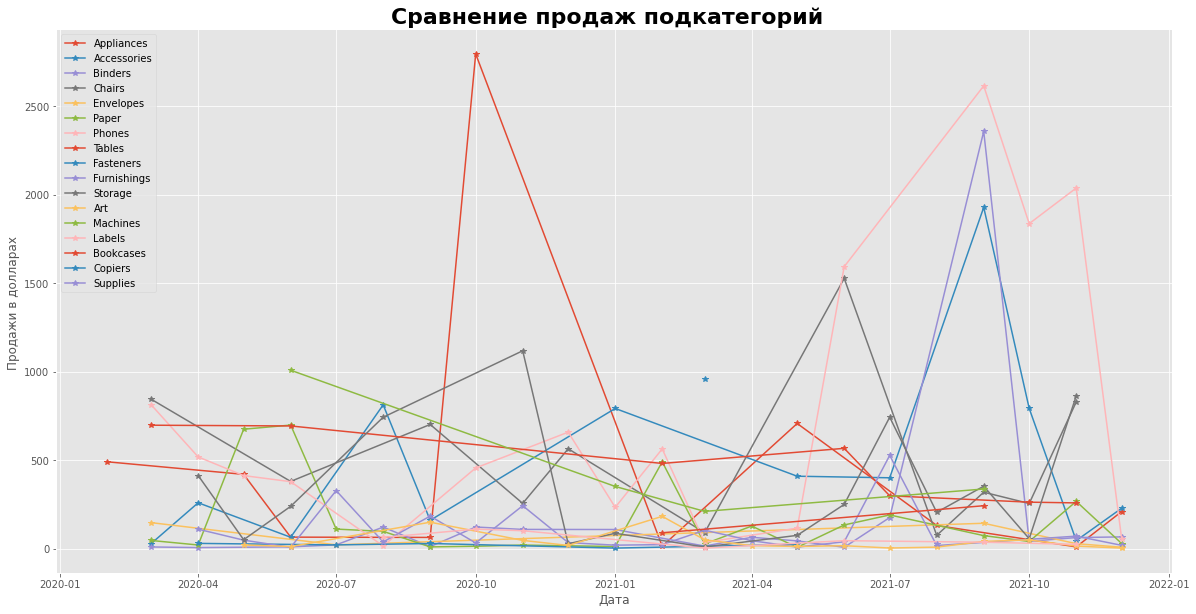

In [57]:
plt.style.use('ggplot')

plt.rcParams["figure.figsize"] = (20,10)

for p in sub_cat:
    data=sub_group.query('subcategory==@p').sort_values(by='month',ascending=True)
    plt.plot(data.month , data.Sales, label=p , marker='*' )
    
    plt.legend()
    plt.title('Сравнение продаж подкатегорий  ' , fontweight = 'bold',fontsize =22)
    plt.xlabel('Дата')
    plt.ylabel('Продажи в долларах ')
    

По месяцам график прыгает и не очень наглядный . Если смотреть год к году то такие подкатегории как Accessories, Phone, Art ,Binders ,Chairs,Envelopes ,Tables,Storage выросли по объему продаж , оставим эти подкатегории для графика по среднему чеку


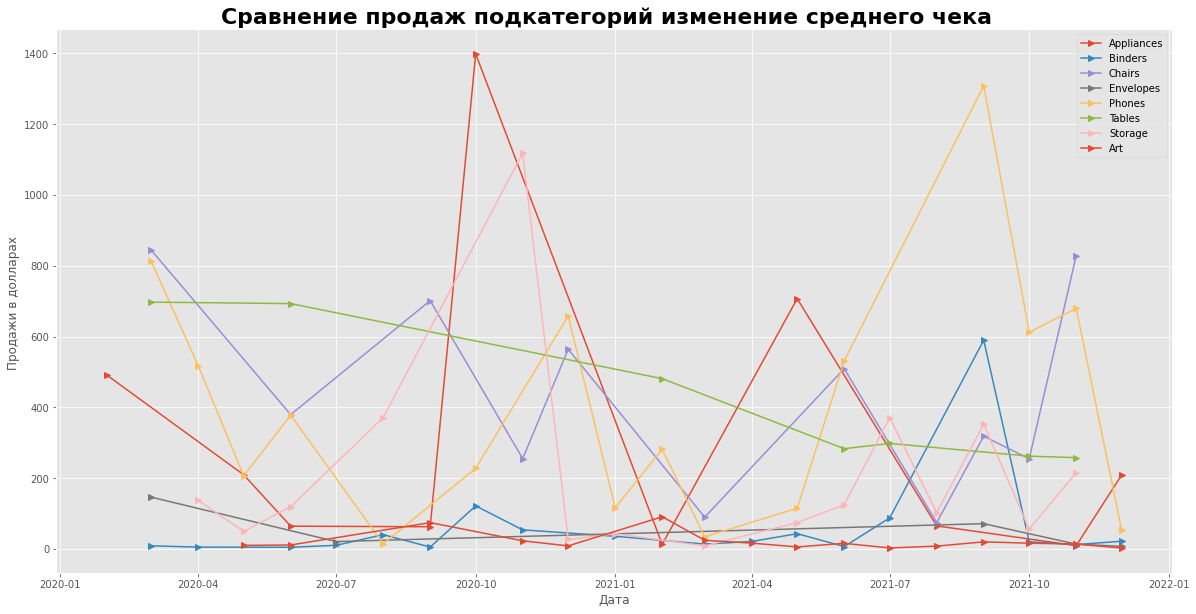

In [58]:
plt.rcParams["figure.figsize"] = (20,10)
topcat=['Appliances',  'Binders', 'Chairs', 'Envelopes',
        'Phones', 'Tables',  'Storage',
       'Art']
for x in topcat:       
    data=sub_group.query('subcategory==@x').sort_values(by='month',ascending=True)
    plt.plot(data.month , data.ave_check, label=x , marker='>' )
    
    plt.legend()
    plt.title('Сравнение продаж подкатегорий изменение среднего чека  ' , fontweight = 'bold',fontsize =22)
    plt.xlabel('Дата')
    plt.ylabel('Продажи в долларах ')
    

По графику можно сделать разные выводы , смотря на каком временом отрезке расматривать данные . Я буду смотреть год к году




Объем продаж год к году


In [59]:
ptable=pd.pivot_table(sub_group,values="Sales",index="date",columns="subcategory" ,aggfunc=sum)
display(ptable)

subcategory,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
date,,,,,,,,,,,,,,,,,
2020,1322.278,3832.894,243.828,406.120,NaN,2743.908,NaN,167.288,77.93,1018.824,273.152,1007.979,1686.674,3249.176,2588.078,NaN,1390.100
2021,4593.984,1069.058,391.660,2936.612,331.0264,3093.314,959.984,177.600,26.07,866.510,106.232,897.469,1391.838,9081.536,2636.628,27.362,1865.536


Средний чек год к году 


In [60]:
ptable_check=pd.pivot_table(year_sub,values="ave_check",index="date",columns="subcategory" )
display(ptable_check)

subcategory,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
date,,,,,,,,,,,,,,,,,
2020,146.919778,547.556286,27.092000,29.008571,NaN,548.78160,NaN,83.644,25.976667,67.921600,39.021714,1007.979000,120.476714,361.019556,258.80780,NaN,695.050000
2021,510.442667,178.176333,23.038824,117.464480,165.5132,386.66425,959.984,35.520,13.035000,61.893571,21.246400,299.156333,60.514696,504.529778,164.78925,13.681,310.922667


Если смотреть год к году то такие подкатегории как  Accessories, Phone,  Art ,Binders ,Chairs,Envelopes ,Tables,Storage выросли по объему продаж 


Категерии, которые растут по количеству продаж и падают по среднему чеку  год к году это :  Art,Chairs, Envelops, Storage ,Tables
